In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the common path
base_path = "/content/drive/MyDrive/Fall 2024/CS 2520/Cycle_Care_Data/"

# List of file names
file_names = [
    "202102-divvy-tripdata.csv",
    "202101-divvy-tripdata.csv",
    "202103-divvy-tripdata.csv",
    "202104-divvy-tripdata.csv",
    "202105-divvy-tripdata.csv",
    "202106-divvy-tripdata.csv",
    "202107-divvy-tripdata.csv",
    "202108-divvy-tripdata.csv",
    "202109-divvy-tripdata.csv",
    "202110-divvy-tripdata.csv",
    "202111-divvy-tripdata.csv",
    "202112-divvy-tripdata.csv"
]

# Read the CSV files into variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = [pd.read_csv(base_path + file_name) for file_name in file_names]

In [ ]:
# Merging all the files into one file '"data"'
df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
data = pd.concat(df)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


In [ ]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [ ]:
false_dates = data.loc[(data['started_at'] > data['ended_at'])]
false_dates.shape

(147, 13)

In [ ]:
#deleting the wrong entries
data = data.drop(false_dates.index.to_list()).copy()

In [ ]:
data['ride_length_min'] = ((data['ended_at'] - data['started_at'])/pd.Timedelta(minutes=1)).astype('int32')

In [ ]:
# Creating the name of the day of the week
data['day'] = data['started_at'].dt.day_name()

# creating the hour of the day
data['hour'] = data['started_at'].dt.hour

# Creating the month column
data['month'] = data['started_at'].dt.month_name()

data['day_of_week'] = data['started_at'].dt.dayofweek

In [ ]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Add a new column 'time_of_day'
data['time_of_day'] = data['hour'].apply(get_time_of_day)

In [ ]:
def membership(member_casual):
    if member_casual == 'member':
      return 'Member'
    else:
      return 'Non-Member'

# Add a new column 'membership'
data['membership'] = data['member_casual'].apply(membership)

In [ ]:
#create column that calculates ride duration
data['ride_length'] = (data['ended_at'] - data['started_at']) / pd.Timedelta(minutes=1)
data['ride_length'] = data['ride_length'].astype('int32')

In [ ]:
data = data.drop(columns = ['start_station_id', 'end_station_id', 'member_casual', 'ride_id', 'started_at', 'ended_at', 'start_station_name', 'end_station_name',
                   'start_lat', 'start_lng', 'end_lat', 'end_lng', 'day_of_week', 'hour', 'ride_length_min'])

In [ ]:
data.head()

,rideable_type,day,month,time_of_day,membership,ride_length
0,classic_bike,Friday,February,Afternoon,Member,6
1,classic_bike,Sunday,February,Evening,Non-Member,19
2,electric_bike,Tuesday,February,Evening,Member,8
3,classic_bike,Tuesday,February,Evening,Member,4
4,electric_bike,Tuesday,February,Afternoon,Member,15


In [ ]:
# Define bins for categories
bins = [-1, 10, 20, 30, 46]  # The -1 is to include 0 in the first bin
labels = ['short_ride', 'average_ride', 'long_ride', 'very_long_ride']

# Assign categories
data['ride_length_category'] = pd.cut(data['ride_length'], bins=bins, labels=labels)

data = data.drop(columns = ['ride_length'])

In [ ]:
# Define a mapping from months to meteorological seasons
seasons_mapping = {
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn',
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
}

# Create a new 'Seasons' column in the original dataframe `df` by mapping the 'Month' column
# Assuming there is a 'Month' column in `df`
data['Season'] = data['month'].map(seasons_mapping)

data = data.drop(columns = ['month'])

data.head()

,rideable_type,day,time_of_day,membership,ride_length_category,Season
0,classic_bike,Friday,Afternoon,Member,short_ride,Winter
1,classic_bike,Sunday,Evening,Non-Member,average_ride,Winter
2,electric_bike,Tuesday,Evening,Member,short_ride,Winter
3,classic_bike,Tuesday,Evening,Member,short_ride,Winter
4,electric_bike,Tuesday,Afternoon,Member,average_ride,Winter


In [ ]:
data['rideable_type'].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [ ]:
data['day'].unique()

array(['Friday', 'Sunday', 'Tuesday', 'Wednesday', 'Monday', 'Thursday',
       'Saturday'], dtype=object)

In [ ]:
data['month'].unique()

KeyError: 'month'

In [ ]:
data['time_of_day'].unique()

array(['Afternoon', 'Evening', 'Morning', 'Night'], dtype=object)

In [ ]:
data['membership'].unique()

array(['Member', 'Non-Member'], dtype=object)

In [ ]:
data['ride_length_category'].unique()

['short_ride', 'average_ride', 'long_ride', 'very_long_ride', NaN]
Categories (4, object): ['short_ride' < 'average_ride' < 'long_ride' < 'very_long_ride']

In [ ]:
data['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
data = data.dropna()
data.isna().sum()

,0
rideable_type,0
day,0
time_of_day,0
membership,0
ride_length_category,0
Season,0


In [ ]:
dummies = pd.get_dummies(data[['rideable_type', 'day', 'time_of_day', 'ride_length_category', 'Season']], drop_first = True).astype(int)

In [ ]:
dummies.columns

Index(['rideable_type_docked_bike', 'rideable_type_electric_bike',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'time_of_day_Evening',
       'time_of_day_Morning', 'time_of_day_Night',
       'ride_length_category_average_ride', 'ride_length_category_long_ride',
       'ride_length_category_very_long_ride', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [ ]:
# Drop the original categorical columns from reg_df
data_dropped = data.drop(['rideable_type', 'day', 'time_of_day', 'ride_length_category', 'Season'], axis=1)

# Concatenate the dummy variables with the original dataframe reg_df
data = pd.concat([data_dropped, dummies], axis=1)

data.head() # Display the first few rows to verify

,membership,rideable_type_docked_bike,rideable_type_electric_bike,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,ride_length_category_average_ride,ride_length_category_long_ride,ride_length_category_very_long_ride,Season_Spring,Season_Summer,Season_Winter
0,Member,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Non-Member,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,Member,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,Member,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,Member,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Convert 'membership' to integers (0s and 1s)
data['membership'] = data['membership'].replace({'Non-Member': 0, 'Member': 1})

<ipython-input-28-1a75d3977289>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['membership'] = data['membership'].replace({'Non-Member': 0, 'Member': 1})


In [ ]:
data.value_counts('membership')

,count
membership,
1,3016362
0,2203519


In [ ]:
from sklearn.utils import resample
# Separate the majority and minority classes
data_majority = data[data['Member'] == 1]
data_minority = data[data['Member'] == 0]

# Undersample the majority class without replacement by resampling the indices
indices_undersampled = resample(data_majority.index,
                                replace=False,
                                n_samples=len(data_minority),
                                random_state=123)  # reproducible results

# Use the undersampled indices to select rows from the original DataFrame
data_majority_undersampled = data.loc[indices_undersampled]

# Combine minority class with downsampled majority class to form a new balanced DataFrame
data = pd.concat([data_majority_undersampled, data_minority])

KeyError: 'Member'

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
import statsmodels.api as sm
from dmba.metric import AIC_score

Colab environment detected.


In [ ]:
y = data['membership']
X = data.drop(columns = ['membership'])

P-Value was too high for docked bikes and skews the model

In [ ]:
X = X.drop(columns = ['rideable_type_docked_bike'])

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import statsmodels.api as sm
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
logit_reg.fit(train_X, train_y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  0.5526316448438323
       rideable_type_electric_bike  day_Monday  day_Saturday  day_Sunday  \
coeff                    -0.347424    0.184847     -0.358072    -0.31543   

       day_Thursday  day_Tuesday  day_Wednesday  time_of_day_Evening  \
coeff      0.216483     0.311323       0.290735             0.004374   

       time_of_day_Morning  time_of_day_Night  \
coeff             0.390565          -0.442822   

       ride_length_category_average_ride  ride_length_category_long_ride  \
coeff                          -0.575041                       -0.893494   

       ride_length_category_very_long_ride  Season_Spring  Season_Summer  \
coeff                            -1.130993       0.067116      -0.338045   

       Season_Winter  
coeff       0.678858  


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
318328,0,0.348017,0.651983,1
327614,1,0.326072,0.673928,1
19901,0,0.538142,0.461858,0
314322,0,0.742992,0.257008,0
473466,0,0.588091,0.411909,0
...,...,...,...,...
223828,0,0.615942,0.384058,0
126701,1,0.299907,0.700093,1
111946,1,0.625402,0.374598,0
238250,0,0.291432,0.708568,1


In [ ]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.6291)

       Prediction
Actual       0       1
     0  849371  472462
     1  689167 1120928
Confusion Matrix (Accuracy 0.6293)

       Prediction
Actual      0      1
     0 566962 314724
     1 459209 747058


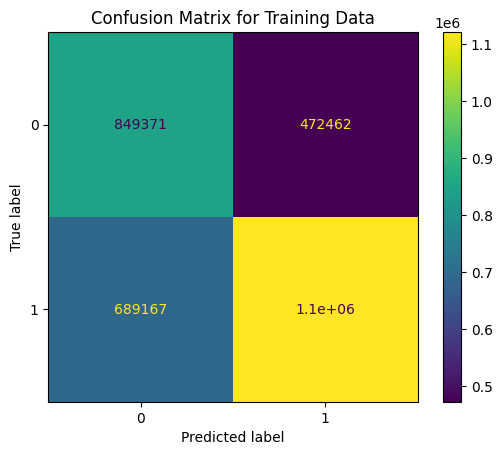

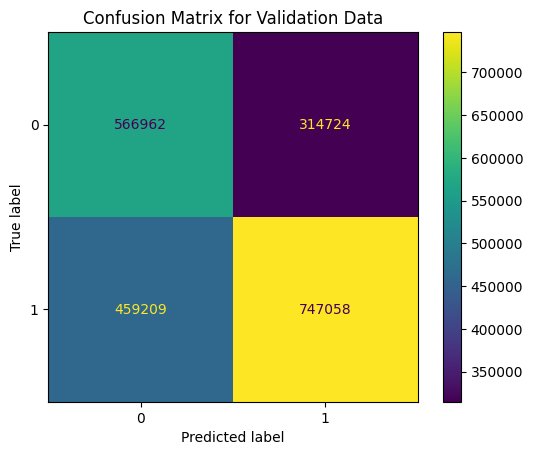

In [ ]:
# Generate predictions for training and validation sets
train_predictions = logit_reg.predict(train_X)
valid_predictions = logit_reg.predict(valid_X)

# Confusion matrix for training data
train_cm = confusion_matrix(train_y, train_predictions)
ConfusionMatrixDisplay(train_cm).plot()
plt.title("Confusion Matrix for Training Data")
plt.show()

# Confusion matrix for validation data
valid_cm = confusion_matrix(valid_y, valid_predictions)
ConfusionMatrixDisplay(valid_cm).plot()
plt.title("Confusion Matrix for Validation Data")
plt.show()

<ipython-input-47-4edd9ddccbff>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette="coolwarm")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

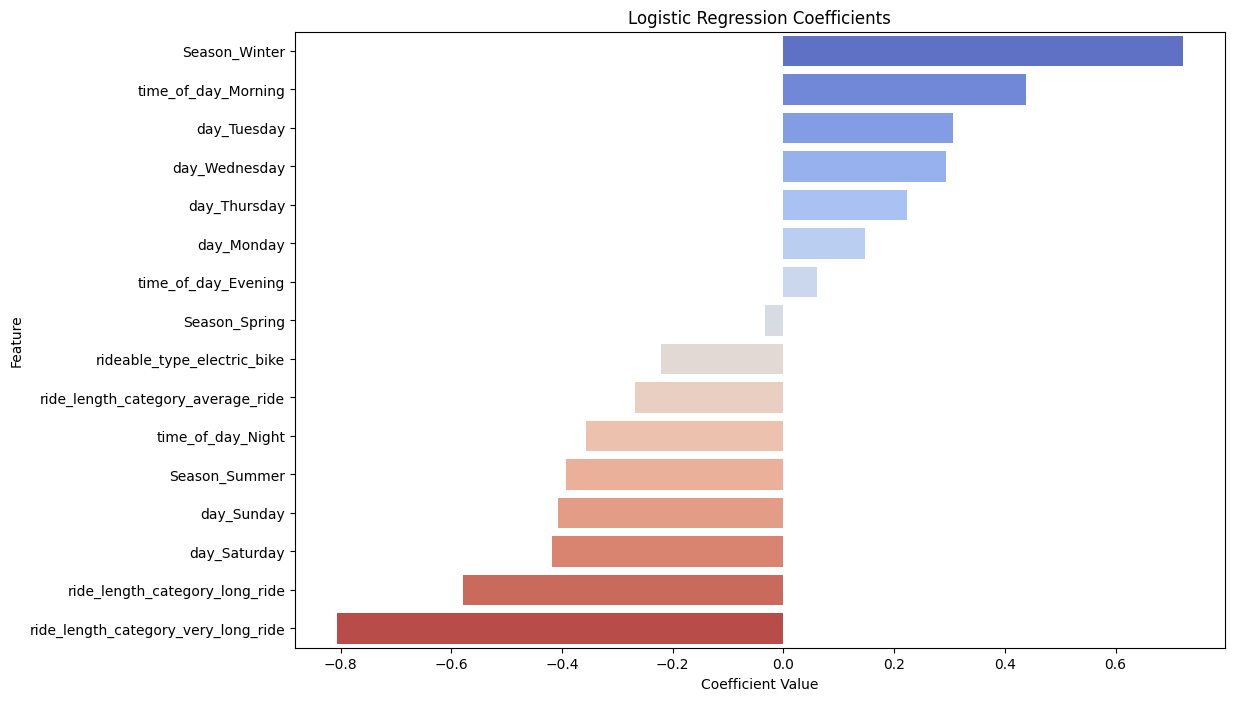

In [ ]:
# Coefficients and features from the provided image for the bar chart
coefficients = {
    'Feature': [
        'rideable_type_electric_bike', 'day_Monday', 'day_Saturday', 'day_Sunday',
        'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'time_of_day_Evening',
        'time_of_day_Morning', 'time_of_day_Night', 'ride_length_category_average_ride',
        'ride_length_category_long_ride', 'ride_length_category_very_long_ride',
        'Season_Spring', 'Season_Summer', 'Season_Winter'
    ],
    'Coefficient': [
        -0.221169, 0.147917, -0.418521, -0.407324, 0.222698, 0.307044, 0.294008,
        0.061099, 0.438771, -0.356911, -0.268404, -0.578132, -0.806139, -0.032822,
        -0.393222, 0.721203
    ]
}


# Create a DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the absolute values of the coefficients in descending order
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Plotting the coefficients in descending order
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=coeff_df, x='Coefficient', y='Feature', palette="coolwarm")

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
legend_patches = [plt.Rectangle((0,0),1,1, color=barplot.patches[i].get_facecolor()) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, labels=coeff_df['Feature'], title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()